# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Force-directed graphs in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Configuracion

In [48]:
import os
from lightning import Lightning

from numpy import random, asarray, linspace, corrcoef
from colorsys import hsv_to_rgb
import networkx as nx

## Conexion al Servidor


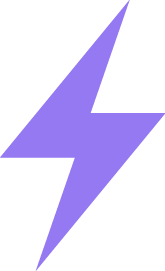

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [49]:
lgn = Lightning(ipython=True)

## <hr> Red binaria aleatoria

Un grafo aleatorio en el que cada nodo tiene el mismo grado , con un estilo predeterminado .
<br>
Usamos la biblioteca networkx para generar el gráfico y obtener su matriz de adyacencia .
<br>
Haga doble clic en un punto para ver sus 'vecinos' ( todos deben tener 3 ) 
<br>
Arrastre los puntos para tratar de mover el gráfico , debe permanecer cerrada.

In [50]:
n = 100
G = nx.random_regular_graph(3,n)
mat = nx.adjacency_matrix(G).todense()
print mat
lgn.force(mat)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


## <hr> La red ponderada aleatoria


La red anterior era binario ( todos los enlaces , ya sea 0 o 1 ) .
Aquí los enlaces son ponderados.

In [65]:
G = nx.random_regular_graph(3,100)
mat = asarray(nx.adjacency_matrix(G).todense()) * (((random.rand(100,100))*5) ** 2)
lgn.force(mat)

## <hr> Red langosta

El gráfico de langosta , y la columna vertebral con algunas hojas , está coloreada por orden de nodo.
<br>
También establecemos todos los nodos con valor menor que 2 a un color gris .

In [66]:
G = nx.random_lobster(60, 0.5, 0.0, seed=44)
mat = nx.adjacency_matrix(G).todense()
n = len(G.nodes())
c = [list(asarray(hsv_to_rgb(float(x) / n , 0.8, 1.0))*255) if y > 1 else [150,150,150] for (x,y) in G.degree_iter()]
lgn.force(mat, color=c)

## <hr> Coloracion por grado

Aquí coloreamos puntos para indicar su grado.
<br>
Haga clic para confirmar que los puntos más grandes tienen más conexiones

In [53]:
G = nx.random_geometric_graph(50, 0.1)
mat = nx.adjacency_matrix(G).todense()
g = G.degree().values()
print mat
lgn.force(mat, group=g, size=(asarray(g) + 1.5)*3)

[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


## <hr> Grafica de la agrupacion

Aquí creamos un gráfico a partir de una matriz de correlación de umbral en los datos extraídos de un conjunto de agrupaciones.
<br>
Las identidades de los cliusters son claros en el gráfico resultante .

In [72]:
d, g = datasets.make_blobs(n_features=5, n_samples=50, centers=5, cluster_std=2.0, random_state=100)
c = corrcoef(d)
c[c<0.9] = 0
lgn.force(c, group=g)

NameError: name 'datasets' is not defined

## Ejemplo Force datos extraidos de una base de datos

In [73]:
import psycopg2, psycopg2.extras
try:
    conn = psycopg2.connect("dbname='gp' user='roma' host='localhost' password='roma'")
except:
    print "I am unable to connect to the database"
cur = conn.cursor()

In [68]:
cur.execute("""SELECT subtipos.idsubtipo,empresas.idempresa,nomempresa,nomsubtipo from produccion inner join empresas on produccion.idempresa=empresas.idempresa inner join subtipos on produccion.idsubtipo=subtipos.idsubtipo where anio=2004 and subtipos.idsubtipo=5""")
rows = cur.fetchall()
i=1
x=[]
y=[]
x.append("Tipo de Energia")
x.append("Energia Hidraulica")

for row in rows:
    x.append(str(row[2]))
    i=i+1
    y.append([int(row[0]),int(row[1])])

## Relacion entre las empresas y el tipo de Energia Hidraulica

<br>
En esta grafica podemos observar el tipo de Energia Hidraulica se relaciona con todas las empresas , ya que cada una de las empresas producen energia a traves de procesos hidraulicos , el nodo 1 o el central en este caso es el tipo de energia Hidraulica y todas las que estan enlazadas a este nodo son las empresas.

In [75]:

lgn.force(y)